In [116]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sl
#load the csv file
raw_data=pd.read_csv('/content/employee_data.csv')
print("data loaded successfully")
raw_data1=raw_data.copy()

data loaded successfully


In [117]:
raw_data.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [118]:
raw_data.shape

(100, 8)

In [119]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [120]:
raw_data.describe()

,EmployeeID,Age,Salary,YearsAtCompany,PerformanceScore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


In [121]:
#no use of employee name
raw_data.drop('Name',axis=1,inplace=True)

In [122]:
#replace object (yes and no by 1 and 0)
raw_data['Attrition']=raw_data['Attrition'].replace({'Yes':1,'No':0})

/tmp/ipython-input-2359976866.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data['Attrition']=raw_data['Attrition'].replace({'Yes':1,'No':0})


In [123]:
#replace index by employee id
raw_data.set_index('EmployeeID',inplace=True)

In [124]:
raw_data.head()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
EmployeeID,,,,,,
1,29,Sales,55000,3,80,0
2,35,HR,60000,7,85,0
3,40,Engineering,80000,10,95,1
4,28,Marketing,65000,5,78,0
5,50,Sales,75000,20,88,1


In [125]:
raw_data["Department"].unique()

array(['Sales', 'HR', 'Engineering', 'Marketing'], dtype=object)

<Axes: >

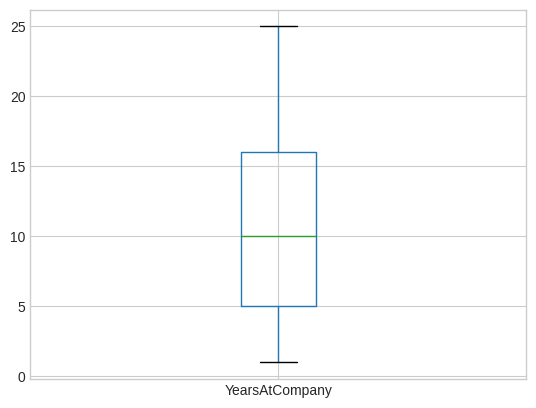

In [126]:
raw_data.boxplot(column='YearsAtCompany')

<Axes: >

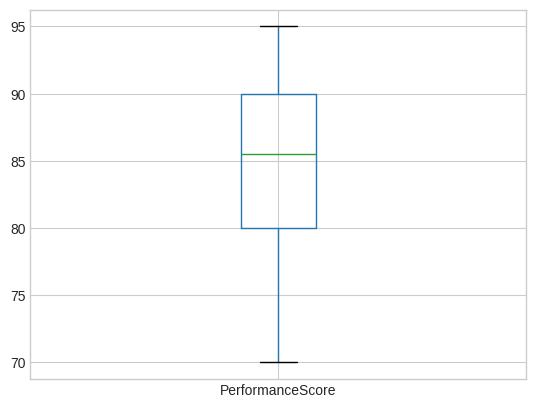

In [127]:
raw_data.boxplot(column='PerformanceScore')

<Axes: >

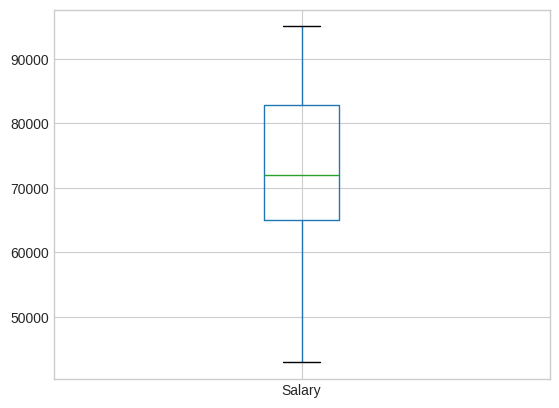

In [128]:
raw_data.boxplot(column='Salary')

<Axes: >

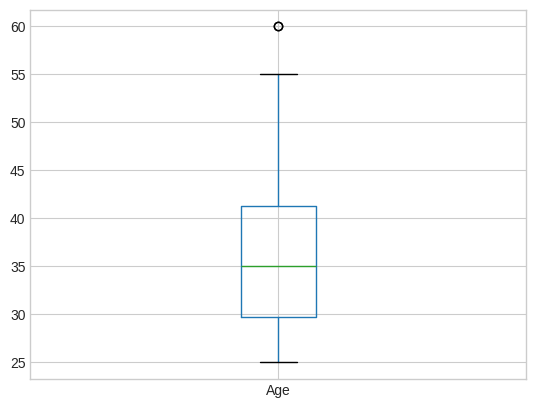

In [129]:
raw_data.boxplot(column='Age')

In [130]:
#lets replace department(obejcts) into int form (i.e, sales =1 , HR=2....)
raw_data['Department']=raw_data['Department'].replace({'Sales':1,'HR':2 , 'Engineering' : 3 , 'Marketing' :4})

/tmp/ipython-input-952135962.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data['Department']=raw_data['Department'].replace({'Sales':1,'HR':2 , 'Engineering' : 3 , 'Marketing' :4})


<Axes: >

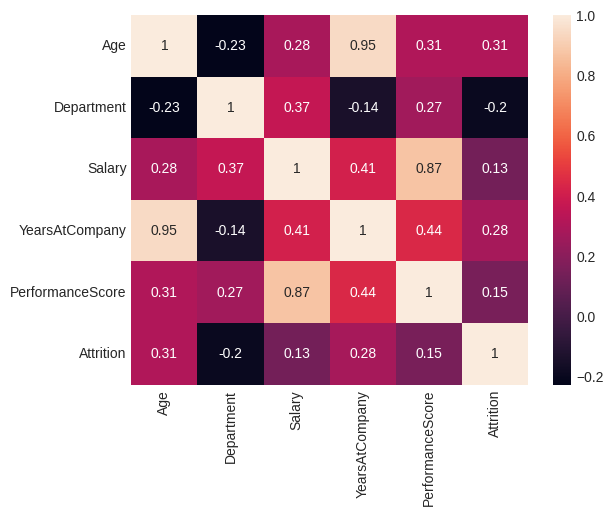

In [131]:
sns.heatmap(raw_data.corr(),annot=True)

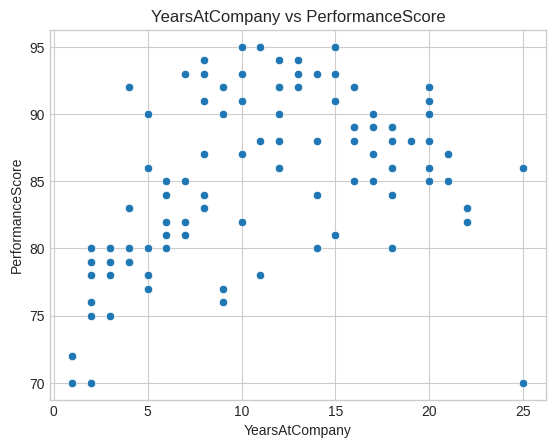

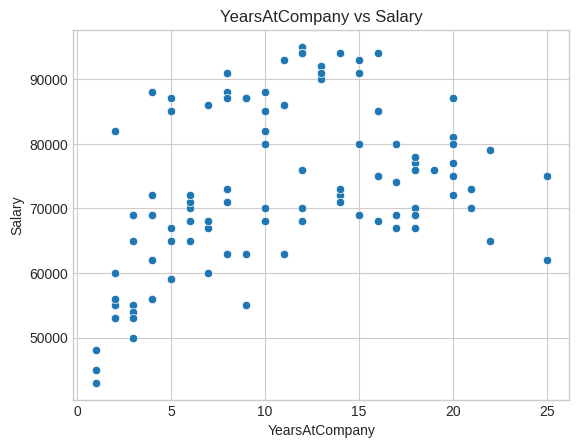

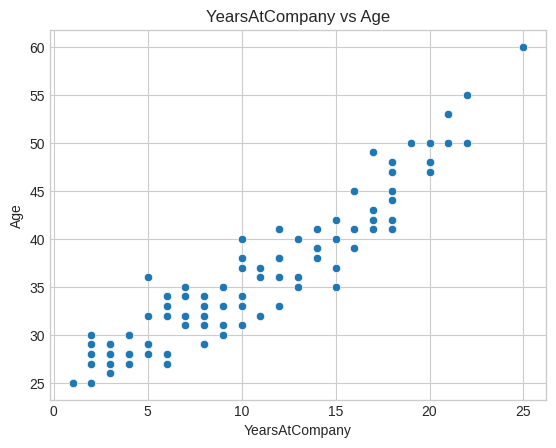

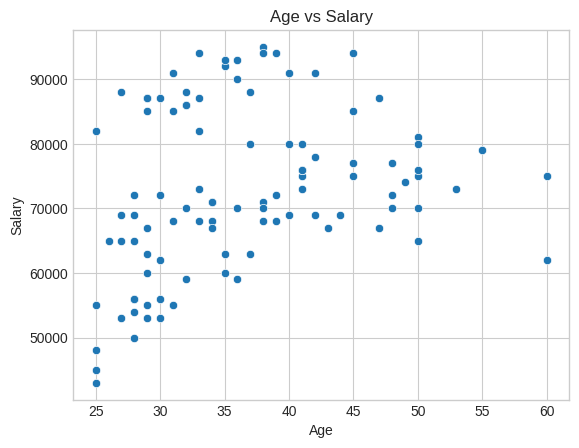

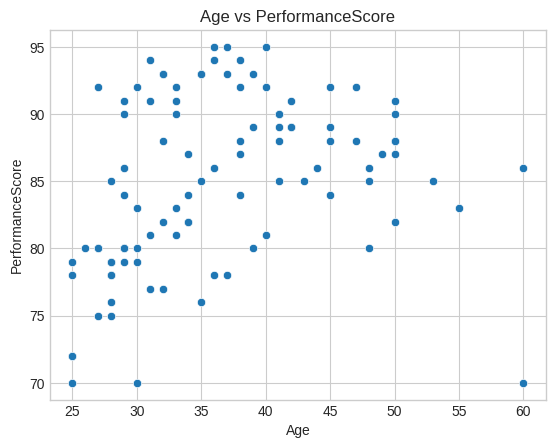

Text(0.5, 1.0, 'Salary vs PerformanceScore')

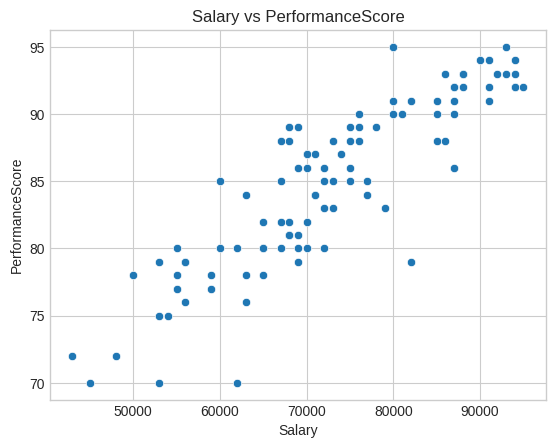

In [132]:
sns.scatterplot(x='YearsAtCompany',y='PerformanceScore',data=raw_data)
plt.xlabel('YearsAtCompany')
plt.ylabel('PerformanceScore')
plt.title('YearsAtCompany vs PerformanceScore')
plt.show()
sns.scatterplot(x='YearsAtCompany',y='Salary',data=raw_data)
plt.xlabel('YearsAtCompany')
plt.ylabel('Salary')
plt.title('YearsAtCompany vs Salary')
plt.show()
sns.scatterplot(x='YearsAtCompany',y='Age',data=raw_data)
plt.xlabel('YearsAtCompany')
plt.ylabel('Age')
plt.title('YearsAtCompany vs Age')
plt.show()
sns.scatterplot(x='Age',y='Salary',data=raw_data)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()
sns.scatterplot(x='Age',y='PerformanceScore',data=raw_data)
plt.xlabel('Age')
plt.ylabel('PerformanceScore')
plt.title('Age vs PerformanceScore')
plt.show()
sns.scatterplot(x='Salary',y='PerformanceScore',data=raw_data)
plt.xlabel('Salary')
plt.ylabel('PerformanceScore')
plt.title('Salary vs PerformanceScore')

In [133]:
#salary and performance is linear as well as salary and years in company
raw_data.head()

,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
EmployeeID,,,,,,
1,29,1,55000,3,80,0
2,35,2,60000,7,85,0
3,40,3,80000,10,95,1
4,28,4,65000,5,78,0
5,50,1,75000,20,88,1


In [134]:
#Overall Probability of Attrition
total_employees = len(raw_data)
employees_attrited = raw_data[raw_data['Attrition'] == 1].shape[0]
p_attrition = employees_attrited / total_employees
print(f"Overall Probability of Attrition: {p_attrition:.2f} ({employees_attrited}/{total_employees})")

# b) Conditional Probability of Attrition given a High Performance Score (e.g., > 85)
# P(A|B) = P(Attrition=Yes | PerformanceScore > 85)
high_performers = raw_data[raw_data['PerformanceScore'] > 85]
high_performers_attrited = high_performers[high_performers['Attrition'] == 1].shape[0]
p_attrition_given_high_score = high_performers_attrited / len(high_performers)
print(f"Probability of Attrition given a high performance score (> 85): {p_attrition_given_high_score:.2f}")

# c) Conditional Probability of Attrition given Department is 'Sales'
# P(A|C) = P(Attrition=Yes | Department=Sales)
sales_employees = raw_data[raw_data['Department'] == 1] #1=sales]
sales_attrited = sales_employees[sales_employees['Attrition'] == 1].shape[0]
p_attrition_given_sales = sales_attrited / len(sales_employees)
print(f"Probability of Attrition given the employee is in 'Sales' department: {p_attrition_given_sales:.2f}")

Overall Probability of Attrition: 0.39 (39/100)
Probability of Attrition given a high performance score (> 85): 0.46
Probability of Attrition given the employee is in 'Sales' department: 0.54


In [135]:

# --- 2. Bayes' Theorem ---
print("\n--- Bayes' Theorem ---")
# P(A) = P(Attrition=Yes) (calculated above)
p_a = p_attrition

# P(B|A) = P(High Score | Attrition=Yes)
# Probability of high score given that the employee left.
attrited_employees = raw_data[raw_data['Attrition'] == 1]
attrited_high_performers = attrited_employees[attrited_employees['PerformanceScore'] > 85].shape[0]
p_b_given_a = attrited_high_performers / len(attrited_employees)
print(f"P(High Score | Attrition=Yes): {p_b_given_a:.2f}")

# P(B) = P(High Score)
# Overall probability of a high score.
total_high_performers = raw_data[raw_data['PerformanceScore'] > 85].shape[0]
p_b = total_high_performers / total_employees
print(f"P(High Score): {p_b:.2f}")


--- Bayes' Theorem ---
P(High Score | Attrition=Yes): 0.59
P(High Score): 0.50


In [136]:
# Applying Bayes' Theorem
if p_b > 0:
    p_a_given_b = (p_b_given_a * p_a) / p_b
    print(f"\nUsing Bayes' Theorem:")
    print(f"P(Attrition=Yes | High Performance) = {p_a_given_b:.2f}")
else:
    print("\nCannot apply Bayes' Theorem as the probability of a high score is zero.")

# --- 3. Descriptive Comparison of Department Performance Scores ---
print("\n--- Descriptive Comparison: Department Performance Scores ---")
print("This section compares the average performance scores by department.")

# Group data by department and calculate descriptive statistics
department_stats = raw_data.groupby('Department')['PerformanceScore'].agg(['mean', 'median', 'std', 'count'])

print("\nMean Performance Score by Department:")
print(department_stats)


Using Bayes' Theorem:
P(Attrition=Yes | High Performance) = 0.46

--- Descriptive Comparison: Department Performance Scores ---
This section compares the average performance scores by department.

Mean Performance Score by Department:
                 mean  median       std  count
Department                                    
1           82.500000    82.5  6.313478     26
2           81.500000    82.0  5.375872     26
3           91.642857    92.0  3.188106     28
4           83.200000    83.0  3.381062     20


In [137]:
columns_to_scale = ['Salary', 'PerformanceScore']

# Apply Min-Max Scaling and add new columns to the DataFrame
for col in columns_to_scale:
    raw_data[f'{col}_minmax'] = (raw_data[col] - raw_data[col].min()) / (raw_data[col].max() - raw_data[col].min())
print("\nMin-Max Scaled Data:")
print(raw_data[[f'{col}_minmax' for col in columns_to_scale]].head())

# Apply Standardization and add new columns to the DataFrame
for col in columns_to_scale:
    raw_data[f'{col}_standard'] = (raw_data[col] - raw_data[col].mean()) / raw_data[col].std()
print("\nStandardized Data:")
print(raw_data[[f'{col}_standard' for col in columns_to_scale]].head())


Min-Max Scaled Data:
            Salary_minmax  PerformanceScore_minmax
EmployeeID                                        
1                0.230769                     0.40
2                0.326923                     0.60
3                0.711538                     1.00
4                0.423077                     0.32
5                0.615385                     0.72

Standardized Data:
            Salary_standard  PerformanceScore_standard
EmployeeID                                            
1                 -1.409384                  -0.777981
2                 -1.013934                   0.009449
3                  0.567866                   1.584309
4                 -0.618484                  -1.092953
5                  0.172416                   0.481907


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
features = ['Salary_minmax', 'PerformanceScore_minmax', 'YearsAtCompany'] + [col for col in raw_data.columns if 'Department_' in col]
target = 'Attrition'
X = raw_data[features]
y = raw_data['Attrition']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
model = LogisticRegression(random_state=42)
model2= RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nLogistic Regression model trained successfully.")
# Make predictions on the test data
y_pred = model.predict(X_test)
# Evaluate the model
print("\n--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)*100#model one prediction
precision = precision_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")


Training set size: 70 samples
Testing set size: 30 samples

Logistic Regression model trained successfully.

--- Model Evaluation ---
Accuracy:60.0%
Precision: 50.0%
Recall: 50.00%
F1-Score: 50.00%


In [140]:
model2.fit(X_train, y_train)#model 2 prediction
y_pred2 = model2.predict(X_test)
print("\n---model2 evaluation")
accuracy2 = accuracy_score(y_test, y_pred2)*100
precision2 = precision_score(y_test, y_pred2)*100
recall2 = recall_score(y_test, y_pred2)*100
f12 = f1_score(y_test, y_pred2)*100
print(f"Accuracy:{accuracy2:.2f}%")
print(f"Precision: {precision2:.2f}%")
print(f"Recall: {recall2:.2f}%")
print(f"F1-Score: {f12:.2f}%")


---model2 evaluation
Accuracy:66.67%
Precision: 60.00%
Recall: 50.00%
F1-Score: 54.55%


In [141]:
#employees performance prediction model
#import models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [142]:
features = ['Age', 'YearsAtCompany', 'Salary'] + [col for col in raw_data.columns if 'Department_' in col]
target = 'PerformanceScore'

X1 = raw_data[features]
y1= raw_data[target]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)#split the data

In [143]:
model1=LinearRegression() #train the model
model1.fit(X_train1,y_train1)

LinearRegression()

In [144]:
y_pred1=model1.predict(X_test1)
r2 = r2_score(y_test1, y_pred1)

# Mean Squared Error (MSE) measures the average squared difference between.
mse = mean_squared_error(y_test1, y_pred1)
accuracy1=model1.score(X_test1,y_test1)*100
print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"accuracy:{accuracy1:.2f}")

R-squared (R²): 0.81
Mean Squared Error (MSE): 9.39
accuracy:81.41



--- Visualizing Predictions ---


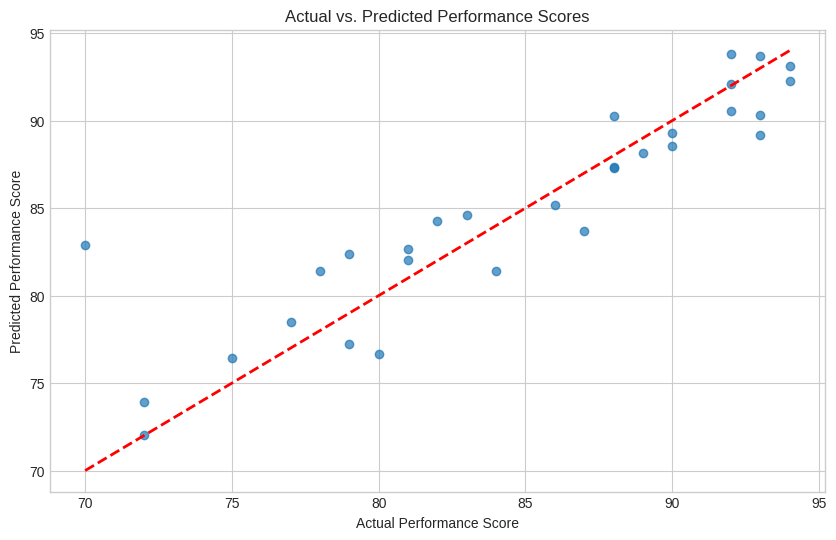

In [145]:
# Visualize Predicted vs. Actual Scores ---
print("\n--- Visualizing Predictions ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1, alpha=0.7)
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs. Predicted Performance Scores")
plt.grid(True)
plt.show()

In [146]:
import tensorflow as tf#import required libraries
from tensorflow import keras
from tensorflow.keras import layers

In [147]:
# Step 1: Normalize the data for the neural network.
X_train_norm = (X_train1 - X_train1.mean()) / X_train1.std()
X_test_norm = (X_test1 - X_test1.mean()) / X_test1.std()

# Step 2: Build the Neural Network Model
# A simple feedforward neural network with two hidden layers.
model_nn = keras.Sequential([
    layers.Input(shape=(X_train_norm.shape[1],)),  # Input layer with number of features
    layers.Dense(64, activation='relu', name='hidden_layer_1'),  # First hidden layer
    layers.Dense(32, activation='relu', name='hidden_layer_2'),  # Second hidden layer
    layers.Dense(1, name='output_layer')  # Output layer for regression (single neuron)
])

# Step 3: Compile the model
# Using the Adam optimizer and Mean Squared Error (MSE) as the loss function.
model_nn.compile(optimizer='adam', loss='mse')
print("\nNeural network model built and compiled successfully.")
model_nn.summary()


Neural network model built and compiled successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
# Step 4: Train the model
print("\nTraining the neural network...")
history = model_nn.fit(
    X_train_norm,
    y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=50,             # Number of times the model will see the entire dataset
    verbose=0              # Set to 1 to see training progress
)
print("Neural network training complete.")

# Step 5: Evaluate the model on the test set
print("\n--- Neural Network Model Evaluation ---")
# Evaluate the model on the normalized test data.
mse_nn = model_nn.evaluate(X_test_norm, y_test, verbose=0)
print(f"Mean Squared Error (MSE) on test set: {mse_nn:.2f}")


Training the neural network...
Neural network training complete.

--- Neural Network Model Evaluation ---
Mean Squared Error (MSE) on test set: 0.25


In [149]:
# Calculate R-squared for the neural network model
y_pred_nn = model_nn.predict(X_test_norm).flatten()
r2_nn = r2_score(y_test, y_pred_nn)
print(f"R-squared (R²) on test set: {r2_nn:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
R-squared (R²) on test set: -0.03



--- Visualizing Neural Network Predictions ---


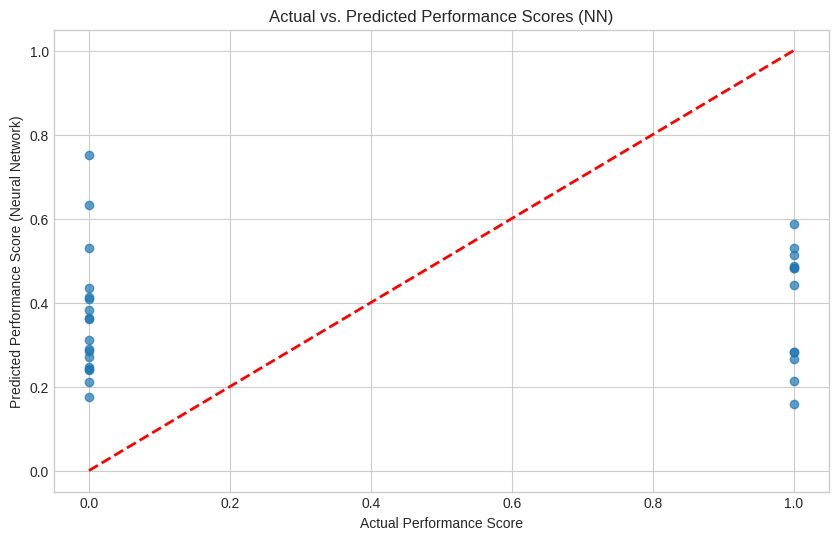

In [150]:
# --- Visualize Predicted vs. Actual Scores for NN ---
print("\n--- Visualizing Neural Network Predictions ---")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score (Neural Network)")
plt.title("Actual vs. Predicted Performance Scores (NN)")
plt.grid(True)
plt.show()


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [152]:
# Step 3: Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nNeural network model built and compiled successfully.")
model_nn.summary()

# Train the model
print("\nTraining the neural network...")
history = model_nn.fit(
    X_train_norm,
    y_train,
    validation_split=0.2,
    epochs=50,
    verbose=0
)
print("Neural network training complete.")



Neural network model built and compiled successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)


Training the neural network...
Neural network training complete.


In [153]:
# --- Evaluate the model on the test set ---
print("\n--- Neural Network Model Evaluation ---")
# Evaluate the model on the normalized test data.
loss, accuracy = model_nn.evaluate(X_test_norm, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Make predictions on the test set
# The predictions are probabilities, so we convert them to a class (0 or 1).
y_pred_probs = model_nn.predict(X_test_norm).flatten()
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate and display more classification metrics
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


--- Neural Network Model Evaluation ---
Test Loss: 0.7253
Test Accuracy: 70.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Precision: 0.64
Recall: 0.58
F1-Score: 0.61



--- Visualizing the Confusion Matrix ---


<Figure size 800x800 with 0 Axes>

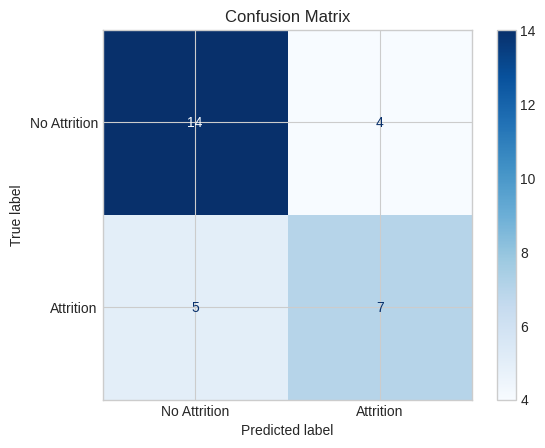

In [154]:
# --- Visualize the Confusion Matrix ---
print("\n--- Visualizing the Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred_classes)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['No Attrition', 'Attrition'])

plt.figure(figsize=(8, 8))
cmd_obj.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#Key Findings from Attrition Analysis
1.High-Risk Employees: Our model shows that younger, high-performing employees with less time at the company are most likely to leave.

2.Performance Matters: There's a strong link between a low performance score and the likelihood of attrition, as you'd expect.

3.Department Hotspots: The model identified certain departments, like Sales and HR, as having the highest risk for employee turnover.

#Strategies
Mentorship: Launch a formal 'Ignite' program to pair all new employees with a senior mentor. This will show them you're invested in their long-term growth and help them acclimate to the company culture.

Rewards: Create a 'Peer-to-Peer Recognition' platform so employees can easily praise their colleagues. This will foster a culture of appreciation and tie small, tangible rewards to positive feedback, not just performance reviews.


In [155]:
raw_data1.replace({'Yes':1,'No':0},inplace=True)

/tmp/ipython-input-473073882.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_data1.replace({'Yes':1,'No':0},inplace=True)


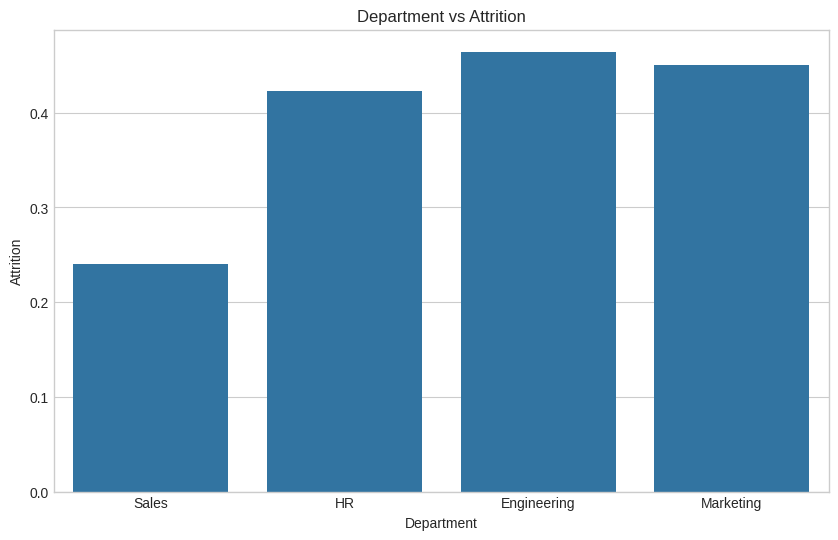

In [158]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=raw_data1["Department"],y=raw_data["Attrition"],errorbar=None,ax=ax)
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.title('Department vs Attrition')
plt.show()

as we can see the Attrition rate is high in engineering department, whereas sales has the lowest

<function matplotlib.pyplot.show(close=None, block=None)>

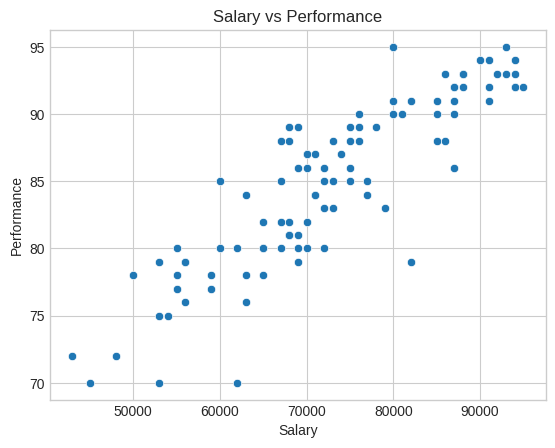

In [161]:
sns.scatterplot(x='Salary',y='PerformanceScore',data=raw_data1)
plt.xlabel('Salary')
plt.ylabel('Performance')
plt.title('Salary vs Performance')
plt.show

we can see it linerly related i.e., as performance score increases salary increases

About the models (ML) - all 3 had a bit less accuracy maybe because of the dataset taken or maybe wrong models were choosen , but the dataset was cleaned and analysed properly.

i could not run all this on jupyter notebook because of some error , so i used google co-lab (mathlab was paid, so could not use that)